# Competency Profiles - K-Means Clustering

-----

This analysis is part of my ([Jannis Zeller](https://github.com/JannisZeller)) PhD project and will hopefully be published soon. The data can unfortunately not be shared currently.

## Load Data

In [ ]:
import numpy as np

import qutools.data as qtdata
import qutools.clustering as qtclst
from qutools.clustering.clusters import quclst_elbow_plot, quclst_silhouette_plot

In [ ]:
quconfig = qtdata.QuConfig.from_yaml("quconfigs/physics-pck.yaml")

qudata = qtdata.QuData(
    quconfig=quconfig,
    df_txt="<NOT IN THIS REPO>/pck-booklets.xlsx",
    df_scr="<NOT IN THIS REPO>/pck-scores.xlsx",
)

[99, '99', '', '-', '--', 'NA', 'Na', 'na', 'Null', 'null', ' ', 'nan', 'NaN', 'Nan', 'NAN', nan].
Checked ID-matches. ✓
Validated ID-columns. ✓
Validated text-columns. ✓
Cleaning text-data whitespaces. ✓
All scores in correct ranges. ✓
Validated score-columns. ✓


In [ ]:
df_pck = qudata.get_scr(verbose=False).merge(qudata.get_total_score())
df_pck = df_pck.rename(columns={"total_score": "Total pPCK Score"})

In [ ]:
dimension_names_en = ["Reproduce", "Apply", "Create", "Analyze", "Evaluate", "Teaching Situation"]
dimension_names_de = ["Reproduzieren", "Anwenden", "Kreieren", "Analysieren", "Evaluieren", "Unterrichtssituation"]

def process_subscales(qusub: qtdata.QuSubscales) -> qtdata.QuSubscales:
    qusub = qusub.combine_subscales(["Erinnern", "Verstehen"], "Reproduzieren")
    qusub = qusub.drop_subscales(["Fachwissen", "Beispiel"])
    for de, en in zip(dimension_names_de, dimension_names_en):
        qusub = qusub.rename_subscale(de, en)
    return qusub

qusubs = qtdata.QuSubscales(
    quconfig=quconfig,
    df_cat="<NOT IN THIS REPO>/susbcales-consensus.xlsx",
)
qusubs = process_subscales(qusubs)

## K-Means Analysis

In [7]:
quclst = qtclst.QuScoreClusters(
    qudata=qudata,
    qusubscales=qusubs,
    scaling="social",
    cluster_method="KMeans",
    drop_incomplete=True,
    drop_earlystoppers=True,
    random_state=42,
)

Info: No number of clusters (`n_clusters`-argument) passed, but `cluster_method=="KMeans"`.
	Defaulting to 4.


### K-Heuristics

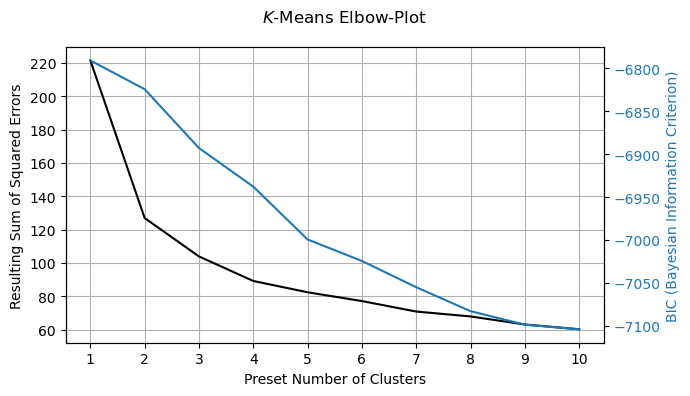

In [8]:
_ = quclst_elbow_plot(quclst=quclst)

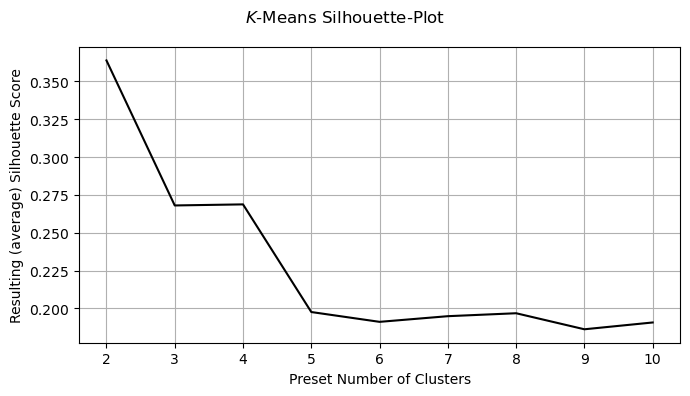

In [9]:
_ = quclst_silhouette_plot(quclst=quclst)

### 4-Cluster-Model

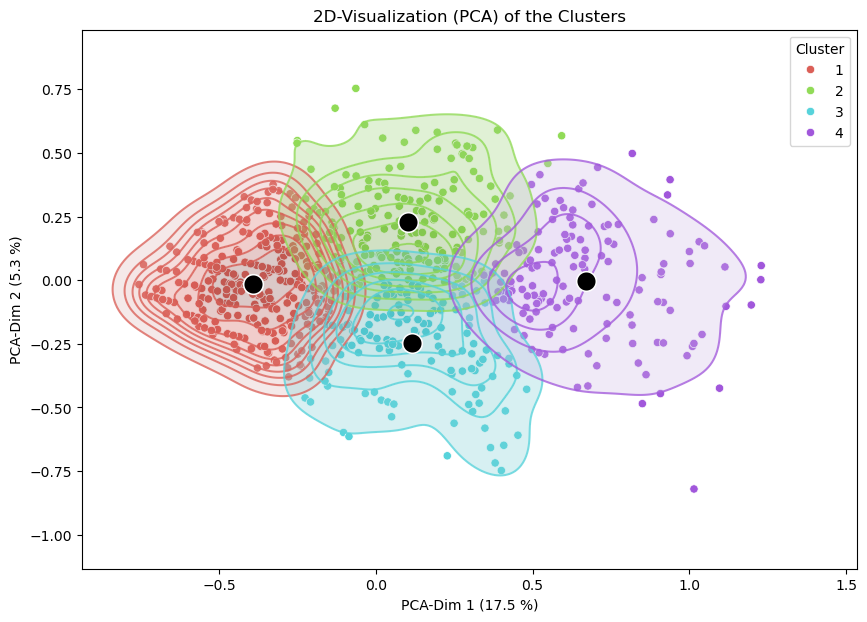

In [ ]:
_ = quclst.scatter_plot()

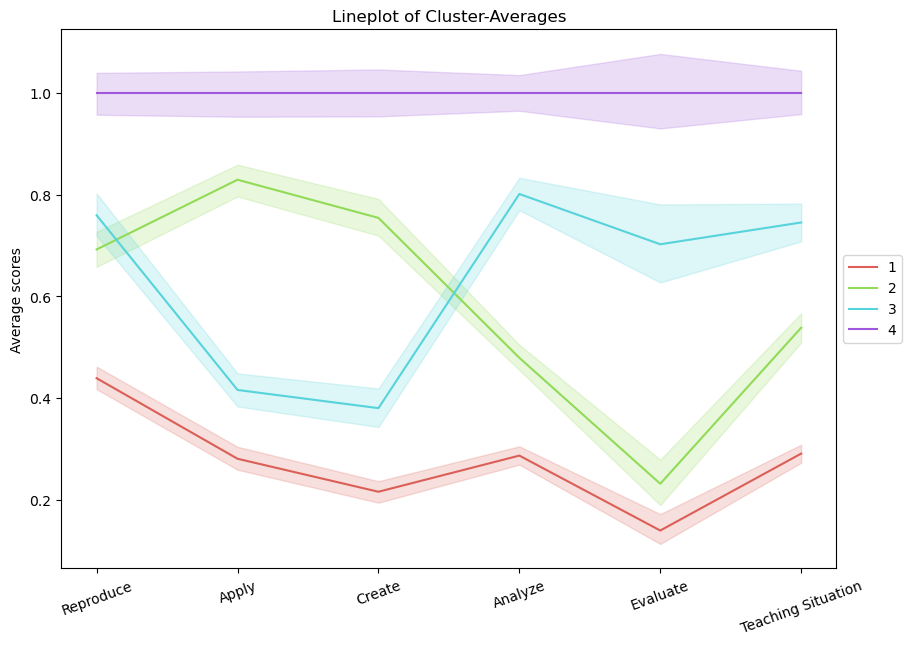

In [ ]:
_ = quclst.centroid_lineplot(
    subscales=["Reproduce", "Apply", "Create", "Analyze", "Evaluate", "Teaching Situation"],
    norm_to_highest=True,
)

In [ ]:
quclst.get_cluster_aggregations().round(2)

cluster count Reproduce       Apply       Analyze       Evaluate        \
                     mean   std  mean   std    mean   std     mean   std   
0       1   321      0.29  0.13  0.17  0.13    0.19  0.11     0.06  0.11   
1       2   179      0.45  0.16  0.51  0.14    0.31  0.11     0.10  0.13   
2       3   144      0.50  0.17  0.26  0.12    0.52  0.13     0.30  0.20   
3       4   135      0.66  0.16  0.61  0.17    0.65  0.14     0.43  0.20   

  Create       Teaching Situation       total_score        
    mean   std               mean   std        mean   std  
0   0.14  0.12               0.18  0.10        9.17  2.99  
1   0.48  0.15               0.34  0.13       15.91  3.66  
2   0.24  0.14               0.46  0.14       16.72  3.62  
3   0.64  0.18               0.62  0.16       23.82  3.90